## **Import Library**

In [1]:
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
sw = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## **Data Collection**

In [2]:
!git clone https://github.com/rakkaalhazimi/Data-NLP-Bahasa-Indonesia/

Cloning into 'Data-NLP-Bahasa-Indonesia'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 41 (delta 9), reused 21 (delta 4), pack-reused 0
Unpacking objects: 100% (41/41), done.


In [3]:
review_hotel = pd.read_csv('/content/Data-NLP-Bahasa-Indonesia/review_hotel.csv')

In [ ]:
review_hotel.head()

,review_id,review_text,category
0,0fc651bfdd38a3b4ba19ef9d0d1e92e3,"Penginapannya rapi, bersih, suasana tenang, pe...",1
1,7d8cb2e465c5602e51c1ba8710e8ff16,"wifi tidak sampai kamar, tidak tersedia heater...",0
2,1f4447c73e5e1aac462d05b0ecbd5a55,"Lantai kamar mandi kotor, bau, dan seperti sdh...",0
3,b9aefbfb0debbfff43f8b268c82b43c0,"Wc jorok.. Kasur tidak dibersihkan,, handuk ti...",0
4,e2afef18bd695fae43d4d53b8c547bd4,bocor lagi,0


1 = Baik

0 = Buruk

In [ ]:
review_hotel.shape

(14856, 3)

In [ ]:
review_hotel.isnull().sum()

review_id      0
review_text    0
category       0
dtype: int64

In [ ]:
review_hotel.duplicated().sum()

0

In [4]:
data = review_hotel[['review_text','category']]
data

,review_text,category
0,"Penginapannya rapi, bersih, suasana tenang, pe...",1
1,"wifi tidak sampai kamar, tidak tersedia heater...",0
2,"Lantai kamar mandi kotor, bau, dan seperti sdh...",0
3,"Wc jorok.. Kasur tidak dibersihkan,, handuk ti...",0
4,bocor lagi,0
...,...,...
14851,kotor dan tidak ada wifi,0
14852,Kamar tidak bersih,0
14853,kamarnya terlalu kecil beberapa cm antara kasu...,0
14854,Wifinya sangat kurang memadai..,0


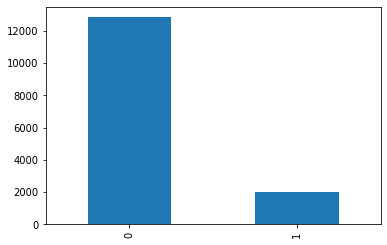

In [ ]:
data['category'].value_counts().plot(kind='bar')

# **Data Preprocessing**

In [5]:
# preprocess text
punctuations = string.punctuation

def preprocess (text):
  text = text.lower()
  text = re.sub(r"[{}]+".format(punctuations), " ", text)
  text = re.sub(r"\s+", " ", text)
  # text = stemmer.stem(text)

  return text

In [6]:
data['review_casefolding'] = data['review_text'].apply(preprocess)
data.head(10)

,review_text,category,review_casefolding
0,"Penginapannya rapi, bersih, suasana tenang, pe...",1,penginapannya rapi bersih suasana tenang pelay...
1,"wifi tidak sampai kamar, tidak tersedia heater...",0,wifi tidak sampai kamar tidak tersedia heater ...
2,"Lantai kamar mandi kotor, bau, dan seperti sdh...",0,lantai kamar mandi kotor bau dan seperti sdh j...
3,"Wc jorok.. Kasur tidak dibersihkan,, handuk ti...",0,wc jorok kasur tidak dibersihkan handuk tidak ...
4,bocor lagi,0,bocor lagi
5,"kebersihan, pelayanan, kerapihan",0,kebersihan pelayanan kerapihan
6,saya hampir tidak bisa tidur krn bantal sangat...,0,saya hampir tidak bisa tidur krn bantal sangat...
7,"Pelayanannya sangat baik,kmr yang bersih,menu ...",1,pelayanannya sangat baik kmr yang bersih menu ...
8,"Kamar banyak kecoa, tlg lebih diperhatikan keb...",0,kamar banyak kecoa tlg lebih diperhatikan kebe...
9,kamar mandi banjir,0,kamar mandi banjir


In [7]:
# Tokenisasi dan menghilangkan stopword
def stopword(text):
  tokens = nltk.word_tokenize(text)
  
  new_string = []
  for i in tokens:
    if i not in sw:
      new_string.append(i)
  
  texts = ' '.join(new_string)
  texts = texts.strip()

  return texts.strip()

# menghilangkan kata yang hanya muncul 1 kali
def clean1w(text):
  tokens = nltk.word_tokenize(text)
  
  new_string = []
  for i in tokens:
    if i > 1:
      new_string.append(i)

  texts = ' '.join(new_string)

  return texts.strip()

In [8]:
data['review_stopword'] = data['review_casefolding'].apply(stopword,clean1w)
data.head(10)

,review_text,category,review_casefolding,review_stopword
0,"Penginapannya rapi, bersih, suasana tenang, pe...",1,penginapannya rapi bersih suasana tenang pelay...,penginapannya rapi bersih suasana tenang pelay...
1,"wifi tidak sampai kamar, tidak tersedia heater...",0,wifi tidak sampai kamar tidak tersedia heater ...,wifi kamar tersedia heater kopi teh dispenser ...
2,"Lantai kamar mandi kotor, bau, dan seperti sdh...",0,lantai kamar mandi kotor bau dan seperti sdh j...,lantai kamar mandi kotor bau sdh jdi sarang ny...
3,"Wc jorok.. Kasur tidak dibersihkan,, handuk ti...",0,wc jorok kasur tidak dibersihkan handuk tidak ...,wc jorok kasur dibersihkan handuk diganti
4,bocor lagi,0,bocor lagi,bocor
5,"kebersihan, pelayanan, kerapihan",0,kebersihan pelayanan kerapihan,kebersihan pelayanan kerapihan
6,saya hampir tidak bisa tidur krn bantal sangat...,0,saya hampir tidak bisa tidur krn bantal sangat...,tidur krn bantal bau apek
7,"Pelayanannya sangat baik,kmr yang bersih,menu ...",1,pelayanannya sangat baik kmr yang bersih menu ...,pelayanannya kmr bersih menu makanannya enak t...
8,"Kamar banyak kecoa, tlg lebih diperhatikan keb...",0,kamar banyak kecoa tlg lebih diperhatikan kebe...,kamar kecoa tlg diperhatikan kebersihannya
9,kamar mandi banjir,0,kamar mandi banjir,kamar mandi banjir


In [9]:
# Lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
def lemmatizers(text):
  tokens = nltk.word_tokenize(text)

  new_string = []
  for token in tokens:
    lemma = lemmatizer.lemmatize(token, pos='v')
    new_string.append(lemma)

  texts = ' '.join(new_string)
  return texts.strip()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [10]:
data['review_lemmatize'] = data['review_stopword'].apply(lemmatizers)
data.sample(10)

,review_text,category,review_casefolding,review_stopword,review_lemmatize
10423,"malam pertama menginap, mau masuk penginapan g...",0,malam pertama menginap mau masuk penginapan ge...,malam menginap masuk penginapan gerbang digemb...,malam menginap masuk penginapan gerbang digemb...
1771,"kenyamanan OK, kebersihan tempat tidur KURANG,...",0,kenyamanan ok kebersihan tempat tidur kurang r...,kenyamanan ok kebersihan tidur respon room ser...,kenyamanan ok kebersihan tidur respon room ser...
14361,pintu kamar mandinya tidak bisa ditutup sempur...,0,pintu kamar mandinya tidak bisa ditutup sempurna,pintu kamar mandinya ditutup sempurna,pintu kamar mandinya ditutup sempurna
292,kunci nya pintu kamari tidak berfungsi dengan ...,0,kunci nya pintu kamari tidak berfungsi dengan ...,kunci nya pintu kamari berfungsi semestinya al...,kunci nya pintu kamari berfungsi semestinya al...
8474,tempatnya sepi :(,0,tempatnya sepi,tempatnya sepi,tempatnya sepi
4316,"kamar sesuai budget, bersih dan nyaman. tapi p...",1,kamar sesuai budget bersih dan nyaman tapi pel...,kamar sesuai budget bersih nyaman pelayanan ny...,kamar sesuai budget bersih nyaman pelayanan ny...
10779,"fasilitasnya sangat minim... kamarnya pebgap, ...",0,fasilitasnya sangat minim kamarnya pebgap kran...,fasilitasnya minim kamarnya pebgap kran air bo...,fasilitasnya minim kamarnya pebgap kran air bo...
258,pelayanan nya kurang bagus .. sarapan pagi ti...,0,pelayanan nya kurang bagus sarapan pagi tidak ...,pelayanan nya bagus sarapan pagi lampu mati pa...,pelayanan nya bagus sarapan pagi lampu mati pa...
12311,not good\n,0,not good,not good,not good
14368,"air dikamar mati, mandi dikamar lain. petugas ...",0,air dikamar mati mandi dikamar lain petugas ma...,air dikamar mati mandi dikamar petugas malam r...,air dikamar mati mandi dikamar petugas malam r...


# **EDA**

In [ ]:
from itertools import chain
from collections import Counter

list_w = data['review_lemmatize'].str.split()
list_m = list(chain(*list_w))
counts = Counter(list_m)
data1 = pd.DataFrame(data=counts, index=['count'])
top_word = data1.T.sort_values(by=['count'], ascending=False).reset_index().head(30)
top_word.head(10)

,index,count
0,kamar,8538
1,nya,2852
2,mandi,2628
3,air,2562
4,yg,2522
5,bersih,2015
6,airy,1938
7,ga,1817
8,ac,1748
9,hotel,1697


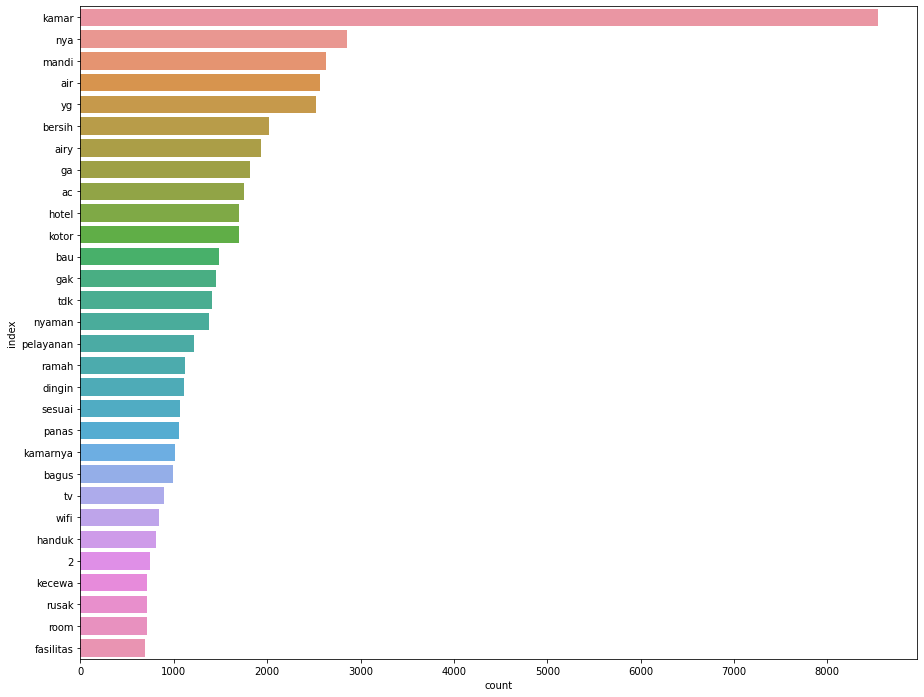

In [ ]:
plt.figure(figsize=(15,12))
sns.barplot(x='count', y='index', data=top_word)

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 

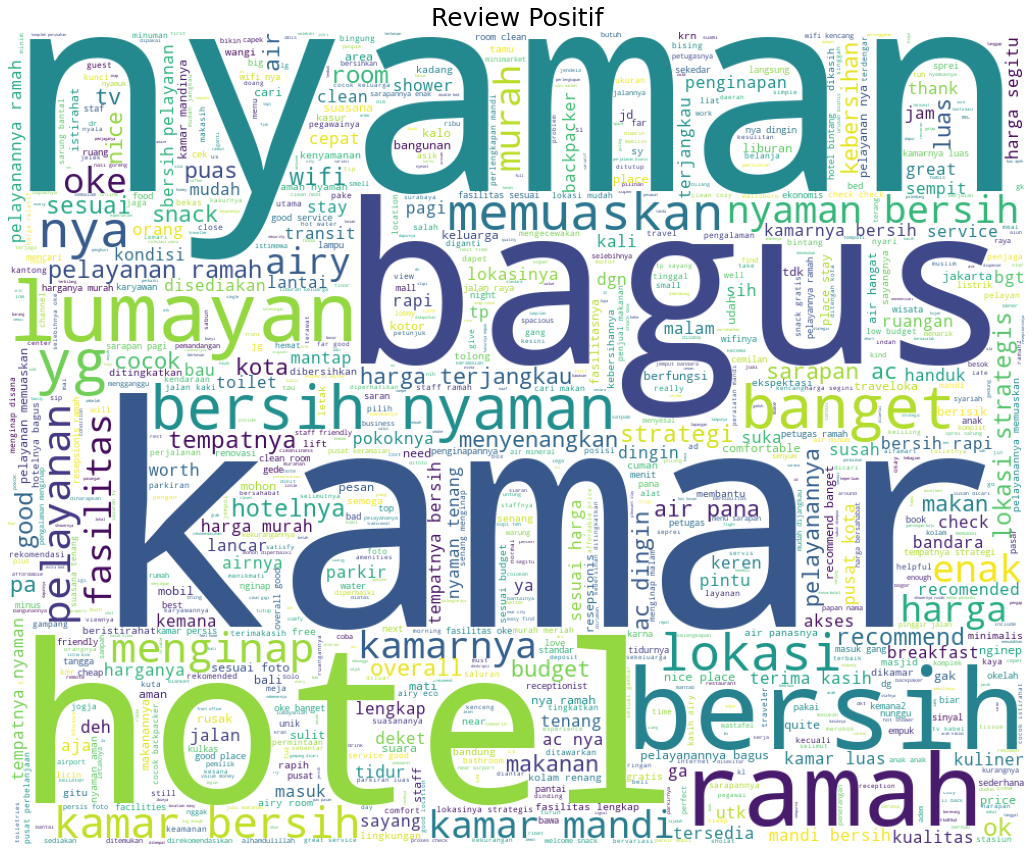

In [ ]:
#wordcloud positif sentiment
wordcloud = WordCloud(max_words = 1000, width = 1000, height = 800, background_color = 'white' , stopwords = STOPWORDS).generate(" ".join(data[data.category == 1].review_lemmatize))

plt.figure(figsize=(20,15))
plt.title('Review Positif',size=25)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

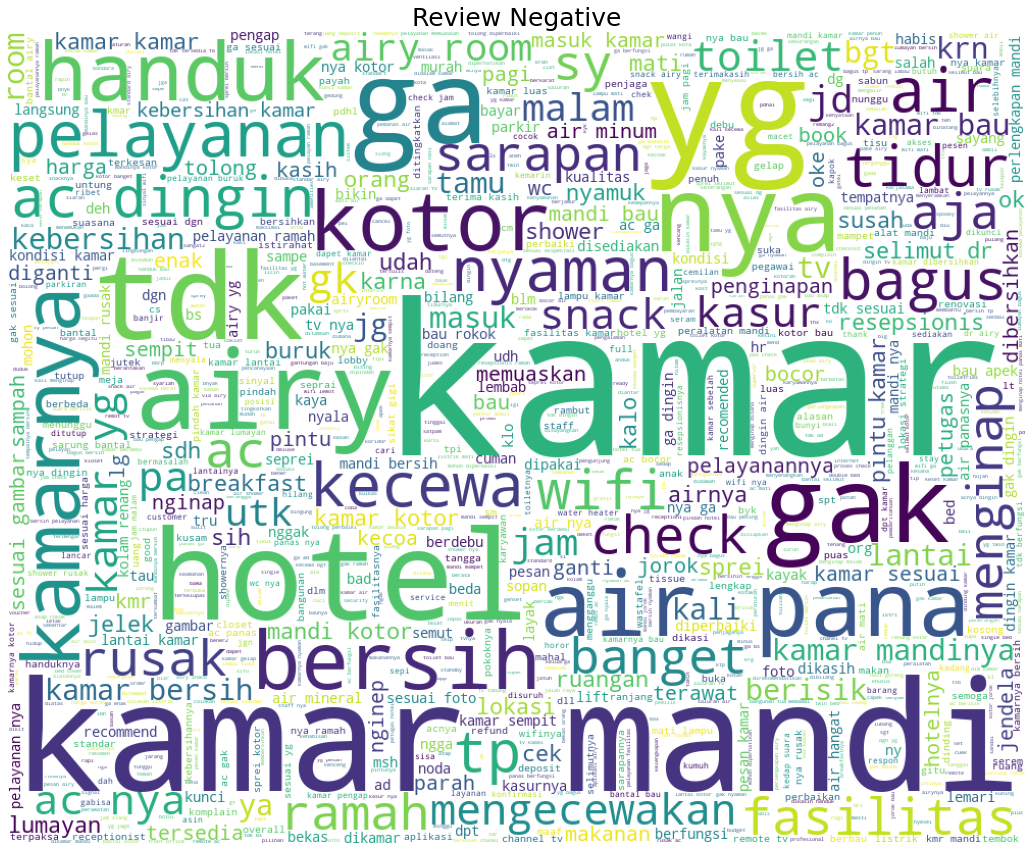

In [ ]:
#wordcloud negative sentiment
wordcloud = WordCloud(max_words = 1000, width = 1000, height = 800, background_color = 'white' , stopwords = STOPWORDS).generate(" ".join(data[data.category == 0].review_lemmatize))

plt.figure(figsize=(20,15), facecolor = None)
plt.title('Review Negative',size=25)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **TFidf**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
review_tf = tf.fit_transform(data['review_lemmatize'].astype('U'))
review_tf

<14856x12956 sparse matrix of type '<class 'numpy.float64'>'
	with 150706 stored elements in Compressed Sparse Row format>

# **Under Sampling**

Karena data imbalance, maka akan dilakukan Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

x = review_tf
y = data['category']

print('Sebelum', pd.Series(y).value_counts())

rus = RandomUnderSampler()
x_under, y_under = rus.fit_resample(x, y)
print('Setelah', pd.Series(y_under).value_counts())


Sebelum 0    12839
1     2017
Name: category, dtype: int64
Setelah 0    2017
1    2017
Name: category, dtype: int64


# **Splitting Data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.2, random_state=42 )

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

nb = MultinomialNB().fit(x_train, y_train)
predict = nb.predict(x_test)

print('Naive Bayes Accuracy', accuracy_score(y_test, predict))
print('Naive Bayes Precision', precision_score(y_test, predict, average='binary', pos_label=0))
print('Naive Bayes Recall', recall_score(y_test, predict, average='binary', pos_label=0 ))
print('Naive Bayes F1_score', f1_score(y_test, predict, average='binary', pos_label=0))
print('\n')
print('Confusion Matrix\n', confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

Naive Bayes Accuracy 0.8475836431226765
Naive Bayes Precision 0.864406779661017
Naive Bayes Recall 0.8419811320754716
Naive Bayes F1_score 0.8530465949820788


Confusion Matrix
 [[357  67]
 [ 56 327]]


              precision    recall  f1-score   support

           0       0.86      0.84      0.85       424
           1       0.83      0.85      0.84       383

    accuracy                           0.85       807
   macro avg       0.85      0.85      0.85       807
weighted avg       0.85      0.85      0.85       807



# Support Vector Machine

In [ ]:
from sklearn import svm

sv = svm.SVC().fit(x_train, y_train)
predict = sv.predict(x_test)

print('SVM Accuracy', accuracy_score(y_test, predict))
print('SVM Precision', precision_score(y_test, predict, average='binary', pos_label=0))
print('SVM Recall', recall_score(y_test, predict, average='binary', pos_label=0 ))
print('SVM F1_score', f1_score(y_test, predict, average='binary', pos_label=0))
print('\n')
print('Confusion Matrix\n', confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

SVM Accuracy 0.8773234200743495
SVM Precision 0.8701594533029613
SVM Recall 0.9009433962264151
SVM F1_score 0.8852838933951332


Confusion Matrix
 [[382  42]
 [ 57 326]]


              precision    recall  f1-score   support

           0       0.87      0.90      0.89       424
           1       0.89      0.85      0.87       383

    accuracy                           0.88       807
   macro avg       0.88      0.88      0.88       807
weighted avg       0.88      0.88      0.88       807



# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42).fit(x_train, y_train)
predict = rf.predict(x_test)

print('RandomForest Accuracy', accuracy_score(y_test, predict))
print('RandomForest Precision', precision_score(y_test, predict, average='binary', pos_label=0))
print('RandomForest Recall', recall_score(y_test, predict, average='binary', pos_label=0 ))
print('RandomForest F1_score', f1_score(y_test, predict, average='binary', pos_label=0))
print('\n')
print('Confusion Matrix\n', confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

RandomForest Accuracy 0.8612143742255266
RandomForest Precision 0.8451327433628318
RandomForest Recall 0.9009433962264151
RandomForest F1_score 0.8721461187214612


Confusion Matrix
 [[382  42]
 [ 70 313]]


              precision    recall  f1-score   support

           0       0.85      0.90      0.87       424
           1       0.88      0.82      0.85       383

    accuracy                           0.86       807
   macro avg       0.86      0.86      0.86       807
weighted avg       0.86      0.86      0.86       807



# **Deep Learning**

In [11]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam 

In [12]:
target = data['category']
feat_text = data["review_lemmatize"]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(feat_text, target, random_state=42)

In [14]:
BATCH_SIZE = 32

In [15]:
# Mengubah input menjadi objek tf.data.Dataset
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))

# Menerapkan shuffle batch dan prefetch pada dataset
train_data = train_data.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data = test_data.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [16]:
max_features = 10000      # Jumlah kosakata
embedding_dim = 16        # Jumlah dimensi dalam word embedding

In [17]:
# Buat text vectorizer
encoder = keras.layers.TextVectorization(max_tokens=max_features)

# Latih tokenizer pada data teks
encoder.adapt(train_data.map(lambda feat, tar: feat))

In [18]:
# Buat model sequential (berurutan)
model = keras.Sequential()
model.add(encoder)
model.add(keras.layers.Embedding(
    input_dim=len(encoder.get_vocabulary()), 
    output_dim=embedding_dim, 
    mask_zero=True)
)
model.add(keras.layers.LSTM(16))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(8))
model.add(keras.layers.Dense(1, activation="sigmoid"))

# Tentukan loss, optimizer dan metrik yang akan digunakan
model.compile(loss="binary_crossentropy", 
              optimizer="Adam",
              metrics=["acc"])

In [19]:
# Melatih model
history = model.fit(train_data,
                    epochs=10,
                    validation_data=test_data)

Epoch 1/10
349/349 [==============================] - 18s 37ms/step - loss: 0.3360 - acc: 0.8916 - val_loss: 0.2022 - val_acc: 0.9330
Epoch 2/10
349/349 [==============================] - 11s 32ms/step - loss: 0.1743 - acc: 0.9444 - val_loss: 0.1941 - val_acc: 0.9378
Epoch 3/10
349/349 [==============================] - 11s 32ms/step - loss: 0.1306 - acc: 0.9584 - val_loss: 0.2096 - val_acc: 0.9365
Epoch 4/10
349/349 [==============================] - 11s 33ms/step - loss: 0.1043 - acc: 0.9669 - val_loss: 0.2388 - val_acc: 0.9292
Epoch 5/10
349/349 [==============================] - 12s 35ms/step - loss: 0.0855 - acc: 0.9729 - val_loss: 0.2663 - val_acc: 0.9311
Epoch 6/10
349/349 [==============================] - 11s 33ms/step - loss: 0.0726 - acc: 0.9781 - val_loss: 0.3154 - val_acc: 0.9300
Epoch 7/10
349/349 [==============================] - 12s 33ms/step - loss: 0.0685 - acc: 0.9801 - val_loss: 0.3400 - val_acc: 0.9281
Epoch 8/10
349/349 [==============================] - 12s 33ms

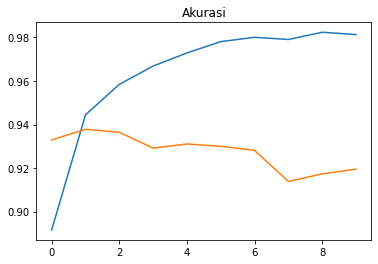

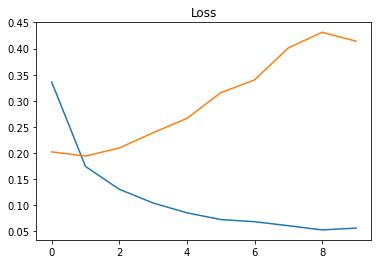

In [20]:
plt.figure()
plt.title("Akurasi")
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])

plt.figure()
plt.title("Loss")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.show()

In [22]:
def prediksi(text):
  review = [text]
  pred = model.predict(review)

  if pred.squeeze() > 0.5:
    print('Sentimen Positif')
  else:
    print('Sentiment Negative')

In [23]:
prediksi('kamar nyaman, parkiran luas')

Sentimen Positif


In [24]:
prediksi('ac tidak dingin, toilet bau, parkiran sempit')

Sentiment Negative


In [32]:
model.save_weights("model_weights")
model.save("model")

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets
